In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from diproperm.DiProPerm import DiProPerm

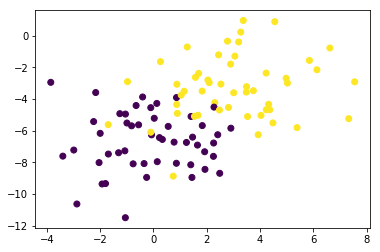

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [3]:
dpp = DiProPerm(B=1000, stat=['md', 't', 'auc'])
dpp.fit(X, y)

Two class DiProPerm of 0 vs. 1 
md: {'obs': 4.542253375623943, 'pval': 0.0, 'Z': 11.266096659955833, 'rejected': True, 'cutoff_val': 1.2511689177621121}
t: {'obs': 11.492468933512152, 'pval': 0.0, 'Z': 15.716113640354573, 'rejected': True, 'cutoff_val': 2.3896382660799733}
auc: {'obs': 0.9548000000000001, 'pval': 0.0, 'Z': 10.274078770897779, 'rejected': True, 'cutoff_val': 0.63646}

In [4]:
# the results are stored in dpp.results[STAT] where STAT is the desired statistic
print('DiProPerm using md statistic')
print(dpp.results['md'])

print('\nDiProPerm using t statistic')
print(dpp.results['t'])

print('\nDiProPerm using auc statistic')
print(dpp.results['auc'])

DiProPerm using md statistic
{'obs': 4.542253375623943, 'pval': 0.0, 'Z': 11.266096659955833, 'rejected': True, 'cutoff_val': 1.2511689177621121}

DiProPerm using t statistic
{'obs': 11.492468933512152, 'pval': 0.0, 'Z': 15.716113640354573, 'rejected': True, 'cutoff_val': 2.3896382660799733}

DiProPerm using auc statistic
{'obs': 0.9548000000000001, 'pval': 0.0, 'Z': 10.274078770897779, 'rejected': True, 'cutoff_val': 0.63646}


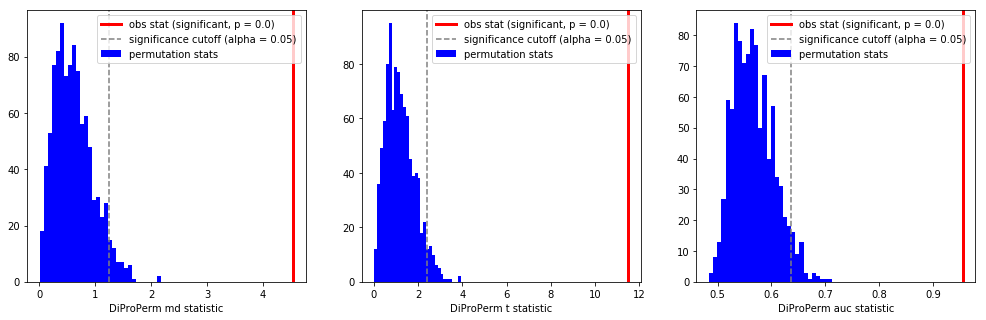

In [5]:
plt.figure(figsize=[17, 5])
plt.subplot(1, 3, 1)
dpp.hist('md')
plt.subplot(1, 3, 2)
dpp.hist('t')
plt.subplot(1, 3, 3)
dpp.hist('auc')

## custom linear classifiers
The `clf` argument can take a function which takes (X, y) data and returns scores (where scores = Xw, w = classification normal vector).

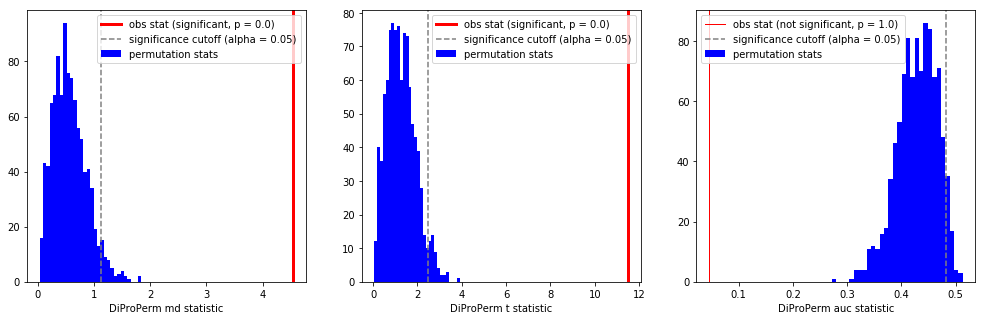

In [10]:
from diproperm.classifiers import get_training_fun
from sklearn.svm import LinearSVC


# clf fits an SVM, selecting C using 5 fold cross-validation, then returns the scores
# of the training data
clf = get_training_fun(clf=LinearSVC(max_iter=10000),
                       param_grid={'C': [.0001, .001, .01, 1, 10, 100]},
                       metric='roc_auc', n_splits=5)

dpp = DiProPerm(B=1000, stat=['md', 't', 'auc'], clf=clf)
dpp.fit(X, y)

plt.figure(figsize=[17, 5])
plt.subplot(1, 3, 1)
dpp.hist('md')
plt.subplot(1, 3, 2)
dpp.hist('t')
plt.subplot(1, 3, 3)
dpp.hist('auc')

## parallel processing

In [13]:
%time dpp = DiProPerm(B=10000, stat=['md', 't', 'auc']).fit(X, y)

%time dpp = DiProPerm(B=10000, stat=['md', 't', 'auc'], n_jobs=-1).fit(X, y)

CPU times: user 11.6 s, sys: 12.7 ms, total: 11.6 s
Wall time: 11.6 s
CPU times: user 415 ms, sys: 25.3 ms, total: 440 ms
Wall time: 3.04 s


In [18]:
dpp = DiProPerm(B=1000, stat='md').fit(X, y)
dpp.results['md']

{'Z': 11.704865481794599,
 'cutoff_val': 1.2678333596648679,
 'obs': 4.542253375623943,
 'pval': 0.0,
 'rejected': True}

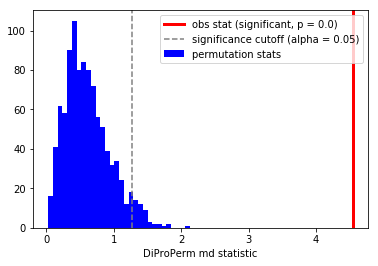